## Obtaining Image Input

In [73]:
import uproot
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os

* Dataframe definition:

In [74]:
class ND280_dataset:
    def __init__(self, path):
        #tree_hattracks = uproot.open(path)['hatdigits']
        tree_hattracks = uproot.open(path)['hatdigits']
        
        df = tree_hattracks.arrays()
        tree = ak.to_dataframe(df)
        keys = tree.index.get_level_values('entry').unique()
        
        self.tree = tree
        self.keys = keys
        
    def __getitem__(self, i):
        key = self.keys[i]
        return self.tree.loc[key]
    
    def __len__(self):
        return len(self.keys)

Select desired path:
- path is the test version with which this code has been generated
- path_1 corresponds to events with a single particle involved
- path_2 corresponds to events with two particles involved

You can select the desired path by changing the #, and then Run All Cells

In [75]:
#path = "/nfs/pic.es/user/e/eriksen/data/pilar/treemaker.root"
#Title='Path'

In [76]:
#path_1="/data/neutrinos/common/casado/T2K/HAT-Reco/treemaker_mu_minus_800.root"
#Title='Path_1'

In [77]:
#path_2= "/data/neutrinos/common/casado/T2K/HAT-Reco/treemaker_mu_minus_800_proton_200.root"
#Title='Path_2'

In [78]:
path= "/nfs/pic.es/user/c/casado/common/T2K/HAT-Reco/treemaker_mu-_800_proton_200MeV_21Aug2023.root"
Title='Path_2'

Definition:

In [79]:
ds = ND280_dataset(path)

In [80]:
print(ds)

In [81]:
df = pd.DataFrame(ds.tree)

In [82]:
df

event  hat  plate  fem  fec  asic  channel  time  nsamples  \
entry   subentry                                                               
0       0             0    0      0    2    0     3       49    44        47   
        1             0    0      0    2    0     3       49    44        47   
        2             0    0      0    2    0     3       49    44        47   
        3             0    0      0    2    0     3       49    44        47   
        4             0    0      0    2    0     3       49    44        47   
...                 ...  ...    ...  ...  ...   ...      ...   ...       ...   
2089280 44         9999    0      0    6    1     4       78   103        49   
        45         9999    0      0    6    1     4       78   103        49   
        46         9999    0      0    6    1     4       78   103        49   
        47         9999    0      0    6    1     4       78   103        49   
        48         9999    0      0    6    1     4       78   103        49   

                  adc  row  col           y            z  qmax  tmax  fwhm  
entry   subentry                                                            
0       0         246    0    8  808.554993 -1840.595947   798    62    13  
        1         236    0    8  808.554993 -1840.595947   798    62    13  
        2         244    0    8  808.554993 -1840.595947   798    62    13  
        3         244    0    8  808.554993 -1840.595947   798    62    13  
        4         247    0    8  808.554993 -1840.595947   798    62    13  
...               ...  ...  ...         ...          ...   ...   ...   ...  
2089280 44        272   28   27  752.875000 -1626.276001   371   122    17  
        45        263   28   27  752.875000 -1626.276001   371   122    17  
        46        253   28   27  752.875000 -1626.276001   371   122    17  
        47        263   28   27  752.875000 -1626.276001   371   122    17  
        48        262   28   27  752.875000 -1626.276001   371   122    17  

[116641736 rows x 17 columns]

In [83]:
df_unique_entries = df.groupby('entry').first()

In [84]:
df_unique_entries

,event,hat,plate,fem,fec,asic,channel,time,nsamples,adc,row,col,y,z,qmax,tmax,fwhm
entry,,,,,,,,,,,,,,,,,
0,0,0,0,2,0,3,49,44,47,246,0,8,808.554993,-1840.595947,798,62,13
1,0,0,0,2,0,3,59,58,71,246,1,8,818.744995,-1840.595947,330,78,31
2,0,0,0,2,0,6,49,99,26,257,11,17,920.645020,-1739.075928,287,109,12
3,0,0,0,2,0,6,58,127,44,266,10,16,910.455017,-1750.355957,288,137,15
4,0,0,0,2,0,6,59,53,65,257,10,17,910.455017,-1739.075928,395,76,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089276,9999,0,0,6,1,4,59,122,59,234,30,27,773.255005,-1626.276001,302,144,30
2089277,9999,0,0,6,1,4,67,127,50,257,29,29,763.065002,-1603.715942,296,148,32
2089278,9999,0,0,6,1,4,68,101,52,241,29,28,763.065002,-1614.995972,547,121,16


Visualization of the Dataframe:

In [85]:
len(df)

116641736

In [86]:
df_sel = df_unique_entries[df_unique_entries['event']==1] #change value between 0-9998

In [87]:
print(df_sel)

       event  hat  plate  fem  fec  asic  channel  time  nsamples  adc  row  \
entry                                                                         
207        1    0      0    2    0     7       78   159        26  268    0   
208        1    0      0    2    1     2       49    88        45  253    8   
209        1    0      0    2    1     2       59   116        26  269    9   
210        1    0      0    2    1     3        6   106       112  260    4   
211        1    0      0    2    1     3        7    87        55  250    4   
...      ...  ...    ...  ...  ...   ...      ...   ...       ...  ...  ...   
425        1    0      0    6    0     4       74    87        48  244   28   
426        1    0      0    6    0     4       75   132        26  277   28   
427        1    0      0    6    0     5       48    98        55  251   23   
428        1    0      0    6    0     5       49    88        47  233   23   
429        1    0      0    6    0     5       59   

* Histogram:

In [88]:
output_folder = f'Histograms {Title}'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
for event_value in range(9):
    df_sel = df_unique_entries[df_unique_entries['event']== event_value]
    plt.hist(df_sel['fem'], bins=100)
    plt.xlabel('Fem')
    plt.xlim(-0.5,7.5)
    plt.ylabel('Frequence')
    plt.title(f'Fem histogram for event {event_value}')
 
    output_file = f'{output_folder}/fem_histogram_{event_value}_{Title}.png'
    plt.savefig(output_file, dpi=200)
    plt.clf()
    
print('All Done!')

All Done!


<Figure size 640x480 with 0 Axes>

* Qmax Fems:

In [89]:
df_sel = df_unique_entries[df_unique_entries['event']==0] #change value between 0-9998

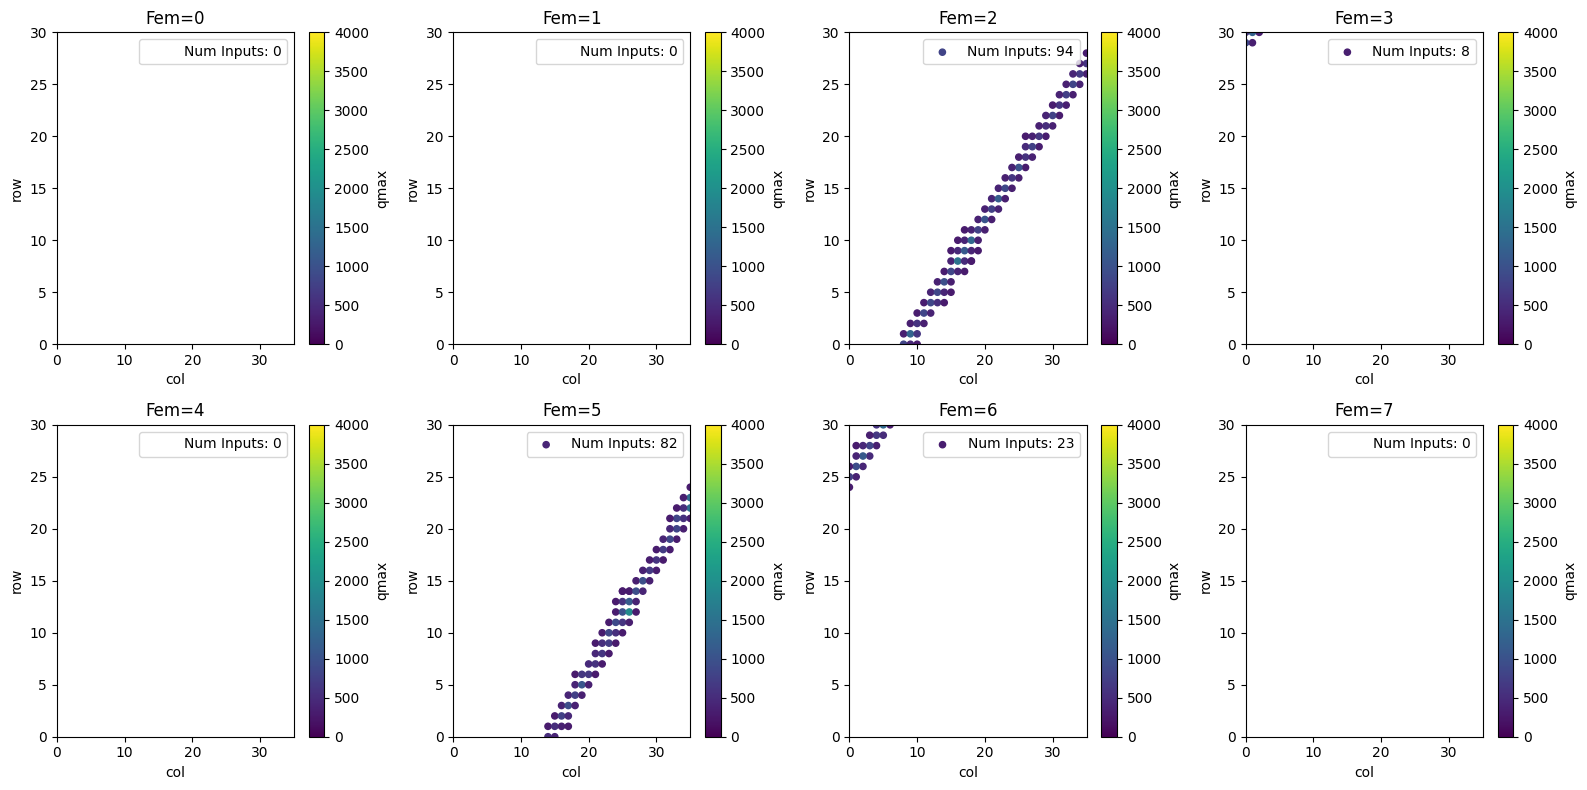

In [90]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))  

qmax_min = 0 #df_sel['qmax'].min()
qmax_max = 4000 #df_sel['qmax'].max()

for fem_value in range(8):
    df_sel_fem = df_sel[df_sel['fem'] == fem_value]
    num_inputs = len(df_sel_fem)
    row = fem_value // 4
    col = fem_value % 4
    ax = df_sel_fem.plot.scatter(x='col', y='row', c='qmax', colormap='viridis', ax=axs[row, col], vmin=qmax_min, vmax=qmax_max)
    ax.set_xlim(0, 35)
    ax.set_ylim(0,30)
    ax.set_title(f'Fem={fem_value}')
    ax.legend([f'Num Inputs: {num_inputs}'])

plt.tight_layout()

plt.show()

* Tmax Fems:

In [91]:
df_sel = df_unique_entries[df_unique_entries['event']==0] #change value between 0-9998

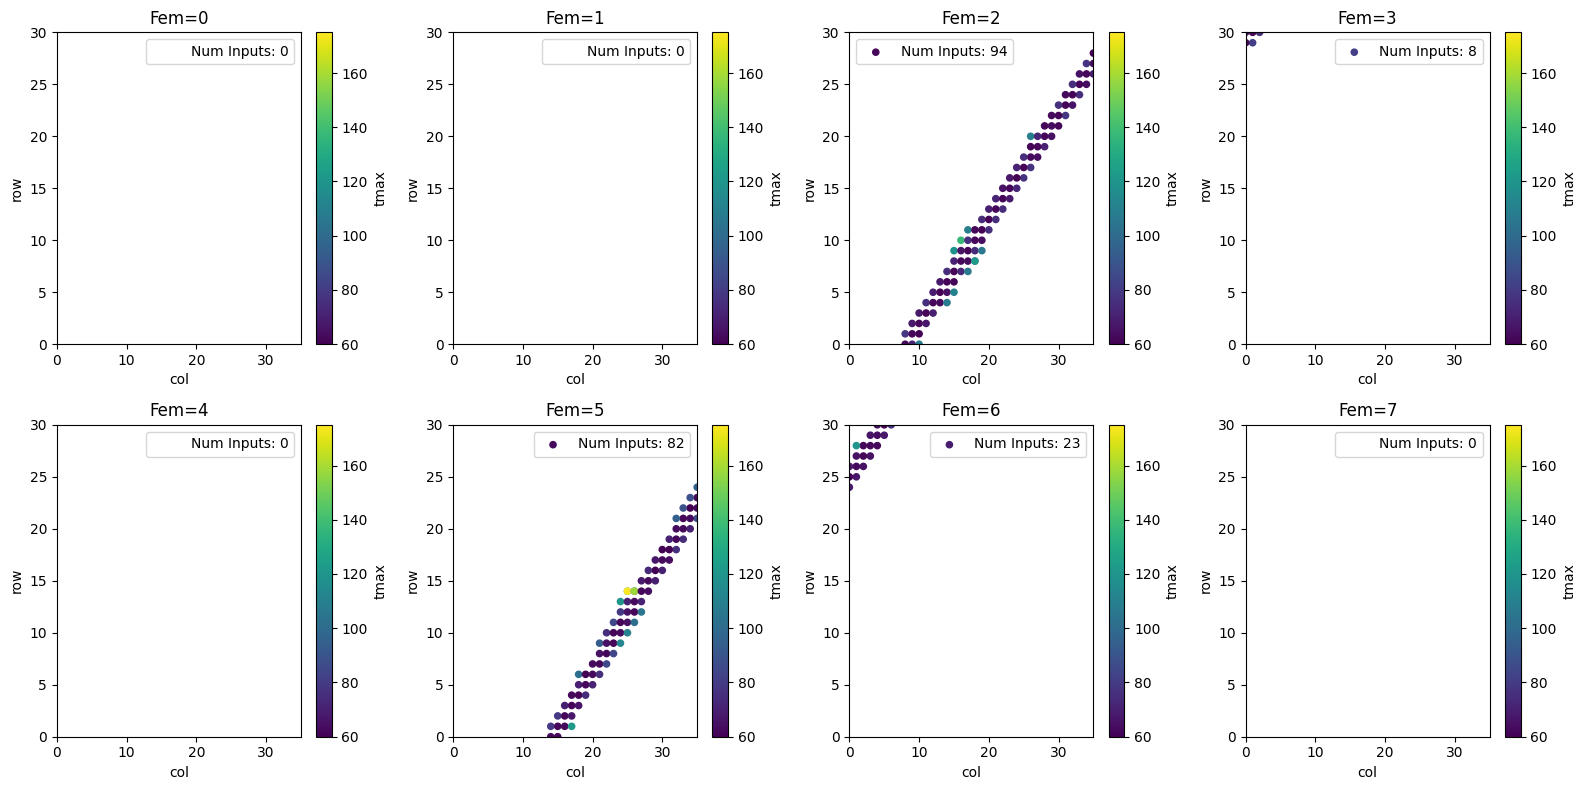

In [92]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))  

global_tmax_max = df_sel['tmax'].max()
global_tmax_min = df_sel['tmax'].min()

for fem_value in range(8):
    df_sel_fem = df_sel[df_sel['fem'] == fem_value]
    num_inputs = len(df_sel_fem)
    row = fem_value // 4
    col = fem_value % 4
    ax = df_sel_fem.plot.scatter(x='col', y='row', c='tmax', colormap='viridis', ax=axs[row, col],vmin=global_tmax_min, vmax=global_tmax_max)
    ax.set_xlim(0, 35)
    ax.set_ylim(0,30)
    ax.set_title(f'Fem={fem_value}')
    ax.legend([f'Num Inputs: {num_inputs}'])

plt.tight_layout()

plt.show()

* 2D maps:

Definition of the method (converting to a matrix is the key concept)

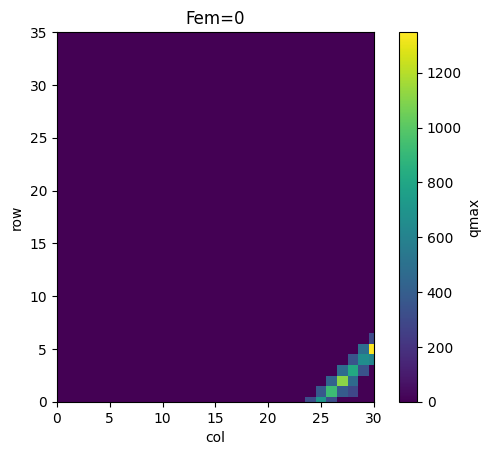

In [93]:
df_sel_fem = df_sel[df_sel['fem'] == 6]
matrix = np.zeros((100, 100))
matrix[df_sel_fem['col'], df_sel_fem['row']] = df_sel_fem['qmax']

plt.imshow(matrix, cmap='viridis', origin='lower')

plt.xlim(0, 30)
plt.ylim(0, 35)

plt.colorbar(label='qmax')

plt.title('Fem=0')

plt.xlabel('col')
plt.ylabel('row')


plt.show()

* Qmax in row,col: 

In [94]:
df_sel = df_unique_entries[df_unique_entries['event']== 1]

All fems representation:

In [95]:
df_sel['qmax'].min()

286

In [96]:
df_sel['qmax'].max()

4095

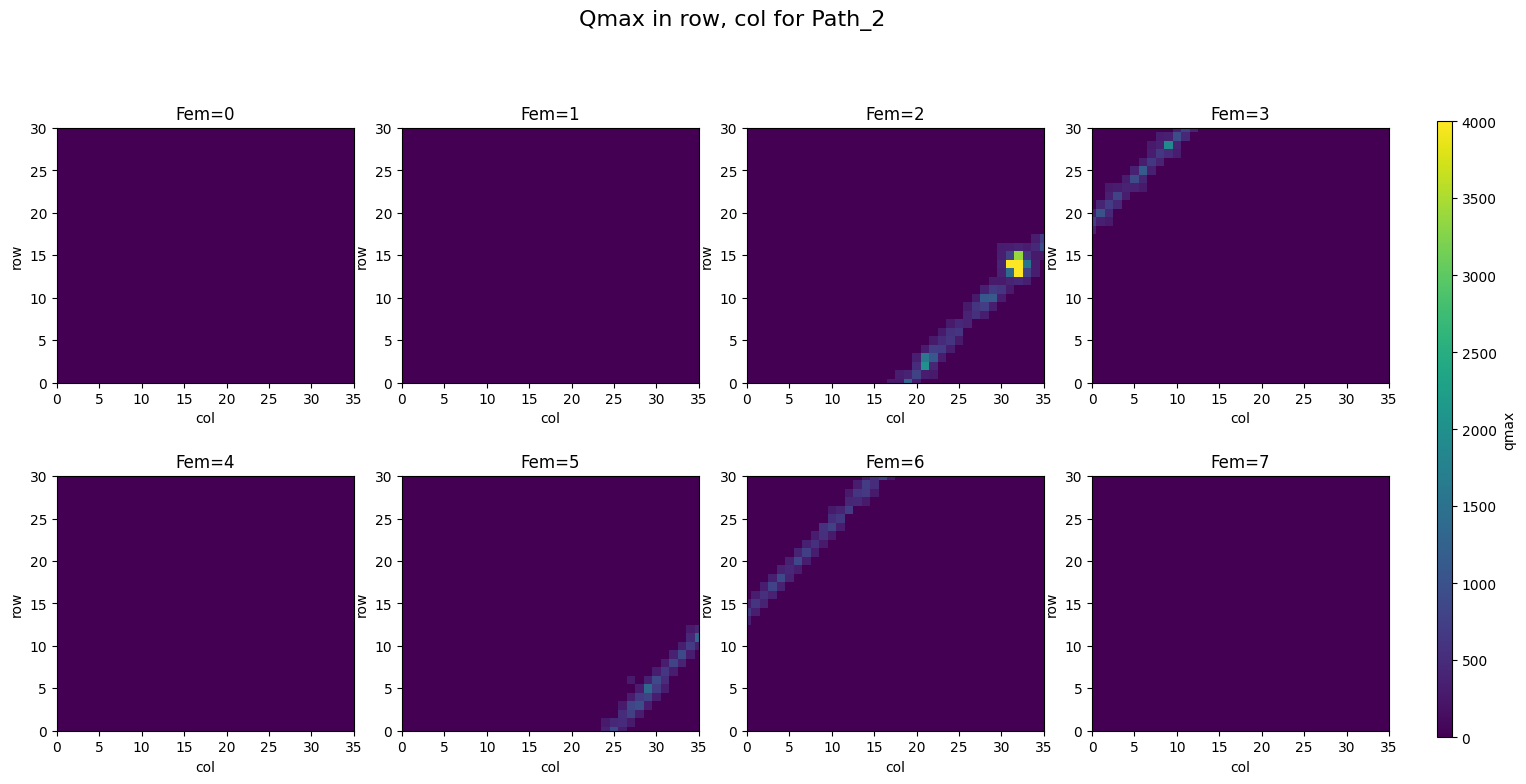

In [97]:
global_qmax_max = 4000
global_qmax_min = 0

fig = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 0.05], wspace=0.2, hspace=0.3)

for fem_value in range(8):
    df_sel_fem = df_sel[df_sel['fem'] == fem_value]
    num_inputs = len(df_sel_fem)

    if num_inputs != 0:
        matrix = np.zeros((100, 100))
        matrix[df_sel_fem['row'], df_sel_fem['col']] = df_sel_fem['qmax']
    else:
        matrix = np.full((100, 100), global_qmax_min)

    ax = plt.subplot(gs[fem_value // 4, fem_value % 4])

    im = ax.imshow(matrix, cmap='viridis', origin='lower', vmin=global_qmax_min, vmax=global_qmax_max)

    ax.set_xlim(0, 35)
    ax.set_ylim(0, 30)

    ax.set_title(f'Fem={fem_value}')
    ax.set_xlabel('col')
    ax.set_ylabel('row')

cax = plt.subplot(gs[:, -1])
plt.colorbar(im, cax=cax, label='qmax')

fig.suptitle(f'Qmax in row, col for {Title}', fontsize=16, y=1.02)

plt.show()

In [98]:
output_folder = f'Qmax in row col {Title}'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for event_value in range(9):
    df_sel = df_unique_entries[df_unique_entries['event']== event_value]

    global_qmax_max = 4000
    global_qmax_min = 0

    fig = plt.figure(figsize=(18, 8))
    gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 0.05], wspace=0.2, hspace=0.3)

    for fem_value in range(8):
        df_sel_fem = df_sel[df_sel['fem'] == fem_value]
        num_inputs = len(df_sel_fem)

        if num_inputs != 0:
            matrix = np.zeros((100, 100))
            matrix[df_sel_fem['row'], df_sel_fem['col']] = df_sel_fem['qmax']
        else:
            matrix = np.full((100, 100), global_qmax_min)

        ax = plt.subplot(gs[fem_value // 4, fem_value % 4])

        im = ax.imshow(matrix, cmap='viridis', origin='lower', vmin=global_qmax_min, vmax=global_qmax_max)

        ax.set_xlim(0, 35)
        ax.set_ylim(0, 30)

        ax.set_title(f'Fem={fem_value}')
        ax.set_xlabel('col')
        ax.set_ylabel('row')

    cax = plt.subplot(gs[:, -1])
    plt.colorbar(im, cax=cax, label='qmax')

    fig.suptitle(f'Qmax in row, col for event {event_value} in {Title}', fontsize=16, y=1.02)
        
    output_file = f'{output_folder}/fem_qmax_row_col_{event_value}_{Title}'
    plt.savefig(output_file, dpi=200, bbox_inches='tight')
    plt.clf()

print('All done!')

All done!


<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>